In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import pickle
import sqlite3 
conn = sqlite3.connect('hiphop_.db')
cur = conn.cursor()

In [2]:
market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]
CLIENT_ID ='d93af13f2f6343c4b7d9e81ba8f29663' 
CLIENT_SECRET = '96842fd0fdc74a739bd6d82c176b090b'

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

In [3]:
response=requests.get('http://www.popvortex.com/music/charts/top-rap-songs.php')
soup=bs(response.content,'html.parser')
titles=soup.findAll('cite',{'class':'title'})
artists=soup.findAll('em',{'class':'artist'})
art,tit=[],[]
for t,a in zip(titles,artists):
    art.append(a.text)
    tit.append(t.text)
dic={'artist':art,'title':tit}

In [4]:
df=pd.DataFrame(dic)
df['artist'][19]='Juice WRLD'
df['artist'][21]='Russ'
df['artist'][23]='True Damage'
df['artist'][4]='Post Malone'
df['artist'][27]='Quality Control'
df['artist'][70]='Tyga'
df['artist'][75]='Cardi B'
df['artist'][76]='Mustard'
df['artist'][81]='Macklemore'
df['artist'][83]='Moneybagg Yo'
df['artist'][35]='Lil Nas X'
df['title'][42]='Restroom Occupied'
df['artist'][44]='Iggy Azalea'
df['title'][55]='Easy'
df['artist'][56]='Fat Joe'
df['artist'][58]='Upchurch'
df['title'][12]='Money In The Grave'
df['title'][13]='Ballin’'
df['title'][23]=df['title'][23][:6]
df['title'][25]=df['title'][23][:10]
df['title'][77]='Stainless'
df['title'][80]='Use This Gospel'
df['title'][81]='Cant Hold Us'
df['title'][82]='Till I Collapse'
df['title'][85]='Ballin’'
df['title'][86]='California Love'
df['title'][92]='Love the Way You Lie'
df['title'][99]='Gangstas Paradise'
df['title'][56]='YES'
df['title'][34]='Hollywoods Bleeding'
df['artist'][63]='Lil Peep'
df['title'][31]='223s'

In [6]:
# res=sp.recommendations(seed_genres='hip_hop')

In [7]:
info=[]
artistss=[]
for a,t in zip(df.artist,df.title):
    p=sp.search(q='artist:' + a.lower() + ' track:' + t.lower(), type='track')
    a=sp.search(q='artist:'+ a.lower(),type='artist')
    try:
        info.append(p['tracks']['items'][0])
    except:
        info.append('NAN') 
    try:
        artistss.append(a['artists']['items'][0]['id'])
    except:
        artistss.append('NAN')
        

In [8]:
uris=[]
for i in range(0,100):
    try:
        uris.append(info[i]['uri'])
    except:
        uris.append(info[i])

In [9]:
df['uris']=uris

In [10]:
df=df[df['uris']!='NAN']

In [11]:
artistss=[]
for ar in df.artist:
    a=sp.search(q='artist:'+ ar.lower(),type='artist')
    try:
        artistss.append(a['artists']['items'][0]['id'])
    except:
        artistss.append('NAN')

In [12]:
df['artistID']=artistss
df=df[df['artistID']!='NAN']

In [13]:
# import datetime as dt     
df['date']=pd.to_datetime('today')
ids=[]
for x,y in zip(df.index,df.date):
    current=str(x)+'x_'+str(y)
    ids.append(current)
df['id']=ids

In [17]:
df.head()

,artist,title,uris,artistID,date,id
0,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,0x_2019-11-26 09:23:39.056823
1,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,1x_2019-11-26 09:23:39.056823
2,Arizona Zervas,ROXANNE,spotify:track:696DnlkuDOXcMAnKlTgXXK,0vRvGUQVUjytro0xpb26bs,2019-11-26 09:23:39.056823,2x_2019-11-26 09:23:39.056823
3,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,3x_2019-11-26 09:23:39.056823
4,Post Malone,Sunflower (Spider-Man: Into the Spider-Verse),spotify:track:3KkXRkHbMCARz0aVfEt68P,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,4x_2019-11-26 09:23:39.056823


In [56]:
type(df.id[0])

str

In [66]:
cur.execute("""DROP TABLE songs""")

In [67]:
cur.execute("""CREATE TABLE songs (
                                    uri TEXT FORIEGN KEY,
                                    rank INT,
                                    song TEXT,
                                    artistId TEXT,
                                    artist TEXT
                                    );
            """)

In [68]:
for a,b,c,d,e in zip(df.uris,df.index,df.title,df.artistID,df.artist):
        cur.execute("""INSERT INTO songs (uri, rank, song, artistId, artist)
                        VALUES('{}','{}','{}','{}','{}');""".format(a,b,c,d,e))

OperationalError: near "o": syntax error

In [40]:
df=df[:-1]

In [69]:
cur.execute("""SELECT * FROM songs;""")
dfr=pd.DataFrame(cur.fetchall())
dfr.columns=[x[0] for x in cur.description]
dfr

,uri,rank,song,artistId,artist
0,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0,Take What You Want (feat. Ozzy Osbourne & Trav...,246dkjvS1zLTtiykXe5h60,Post Malone
1,spotify:track:21jGcNKet2qwijlDFuPiPb,1,Circles,246dkjvS1zLTtiykXe5h60,Post Malone
2,spotify:track:696DnlkuDOXcMAnKlTgXXK,2,ROXANNE,0vRvGUQVUjytro0xpb26bs,Arizona Zervas
3,spotify:track:21jGcNKet2qwijlDFuPiPb,3,Circles,246dkjvS1zLTtiykXe5h60,Post Malone
4,spotify:track:3KkXRkHbMCARz0aVfEt68P,4,Sunflower (Spider-Man: Into the Spider-Verse),246dkjvS1zLTtiykXe5h60,Post Malone
5,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,5,BOP,4r63FhuTkUYltbVAg5TQnk,DaBaby
6,spotify:track:3eekarcy7kvN4yt5ZFzltW,6,HIGHEST IN THE ROOM,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott
7,spotify:track:7dt6x5M1jzdTEt8oCbisTK,7,Better Now,246dkjvS1zLTtiykXe5h60,Post Malone
8,spotify:track:6MxMqCgqmekcr0VwSU7AVH,8,Time,6fOMl44jA4Sp5b9PpYCkzz,NF


In [63]:
df[8:]

,artist,title,uris,artistID,date,id
8,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,6fOMl44jA4Sp5b9PpYCkzz,2019-11-26 09:23:39.056823,8x_2019-11-26 09:23:39.056823
9,Ciara,"Melanin (feat. Lupita Nyong'o, Ester Dean, Cit...",spotify:track:5UtN4XWCmeZWsbu5mRpPSQ,2NdeV5rLm47xAvogXrYhJX,2019-11-26 09:23:39.056823,9x_2019-11-26 09:23:39.056823
10,Post Malone,Goodbyes (feat. Young Thug),spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,10x_2019-11-26 09:23:39.056823
14,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,14x_2019-11-26 09:23:39.056823
15,Wale,On Chill (feat. Jeremih),spotify:track:5z51HY4ei5QhTjcvwq5Msw,67nwj3Y5sZQLl72VNUHEYE,2019-11-26 09:23:39.056823,15x_2019-11-26 09:23:39.056823
16,Stormzy,Own It (feat. Ed Sheeran & Burna Boy),spotify:track:07s9NNOT0sZQp7TyolLLgu,2SrSdSvpminqmStGELCSNd,2019-11-26 09:23:39.056823,16x_2019-11-26 09:23:39.056823
17,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,5K4W6rqBFWDnAN6FQUkS6x,2019-11-26 09:23:39.056823,17x_2019-11-26 09:23:39.056823
20,Young Thug,Hot (feat. Gunna),spotify:track:5Z8HZM6iQMhhqyPcCGY5g9,50co4Is1HCEo8bhOyUWKpn,2019-11-26 09:23:39.056823,20x_2019-11-26 09:23:39.056823
26,Post Malone,I Fall Apart,spotify:track:75ZvA4QfFiZvzhj2xkaWAh,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,26x_2019-11-26 09:23:39.056823
28,Post Malone,Psycho (feat. Ty Dolla $ign),spotify:track:3swc6WTsr7rl9DqQKQA55C,246dkjvS1zLTtiykXe5h60,2019-11-26 09:23:39.056823,28x_2019-11-26 09:23:39.056823


In [65]:
bars=[] #a count of beats, bar offsets indicate downbeats (first beat of measure)
beats=[] #Basic time unit for a piece of music, each tick of a metronome
tatums=[] #smaller than a beat, smallest pulse you can hear in music
#lowest regular pulse train that a listener intuitvely infers from the timing 
#of a persevied musical event
sections=[] #accumulations of bars and measures and stuff
#large variations in rhythm of tamber
#ex. chorus, verse, bridge, guitar solo
segments=[] #segment of time defined as a given number of beats
#a chunk of time that has generally same sound throughout
#very small pieces of time
#characterized by their perceptual onsets, duration, loudness, pitch, timbre and content
for u in df.uris:
    aa=sp.audio_analysis(u)
    bars.append(aa['bars'])
    beats.append(aa['beats'])
    tatums.append(aa['tatums'])
    sections.append(aa['sections'])
    segments.append(aa['segments'])
sp.audio_analysis(df.uris[0]).keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

In [34]:
sp.artist_top_tracks(df.artistID[0])['tracks'][6]['album']['name']

"Hollywood's Bleeding"

In [35]:
sp.artist_related_artists(artistss[0])['artists'][0]['name']

'Rae Sremmurd'

In [66]:
dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration=[],[],[],[],[],[],[],[],[],[],[],[]
time=[]
for u in df.uris:
    feats=sp.audio_features(u)[0]
    dance.append(feats['danceability'])
    energy.append(feats['energy'])
    key.append(feats['key'])
    loudness.append(feats['loudness'])
    mode.append(feats['mode'])
    speechiness.append(feats['speechiness'])
    acousticness.append(feats['acousticness'])
    instrumentalness.append(feats['instrumentalness'])
    liveness.append(feats['liveness'])
    valence.append(feats['valence'])
    tempo.append(feats['tempo'])
    duration.append(feats['duration_ms'])
    time.append(feats['time_signature'])

In [70]:
dfi=pd.DataFrame()
dfi['uri']=df.uris
dfi['dance']=dance
dfi['energy']=energy
dfi['key']=key
dfi['loudness']=loudness
dfi['mode']=mode
dfi['speechiness']=speechiness
dfi['acousticness']=acousticness
dfi['instrumentalness']=instrumentalness
dfi['liveness']=liveness
dfi['valence']=valence
dfi['tempo']=tempo
dfi['duration']=duration
dfi['ts']=time

In [71]:
dfi

,uri,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts
0,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280,4
1,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.2720,139.919,229573,4
2,spotify:track:5bvnqVuq7UFl0txSlHpsfS,0.866,0.530,0,-6.347,0,0.0495,0.517000,0.001590,0.0946,0.2030,104.952,197973,4
3,spotify:track:696DnlkuDOXcMAnKlTgXXK,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636,5
5,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.8360,126.770,159715,4
7,spotify:track:3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,175721,4
8,spotify:track:07s9NNOT0sZQp7TyolLLgu,0.826,0.790,10,-4.341,1,0.1260,0.007300,0.000010,0.1220,0.3770,104.032,216520,4
9,spotify:track:6MxMqCgqmekcr0VwSU7AVH,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.1980,98.049,240429,4
10,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280,4
11,spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.1630,150.068,174853,4


In [72]:
dfi.reset_index(inplace=True)
dfi.rename(columns={'index':'rank'},inplace=True)
with open('song_info_df.pickle', 'wb') as f:
    pickle.dump(dfi, f)

In [73]:
dfi

,rank,uri,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts
0,0,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280,4
1,1,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.2720,139.919,229573,4
2,2,spotify:track:5bvnqVuq7UFl0txSlHpsfS,0.866,0.530,0,-6.347,0,0.0495,0.517000,0.001590,0.0946,0.2030,104.952,197973,4
3,3,spotify:track:696DnlkuDOXcMAnKlTgXXK,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.4570,116.735,163636,5
4,5,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.8360,126.770,159715,4
5,7,spotify:track:3eekarcy7kvN4yt5ZFzltW,0.598,0.427,7,-8.764,0,0.0317,0.054600,0.000006,0.2100,0.0605,76.469,175721,4
6,8,spotify:track:07s9NNOT0sZQp7TyolLLgu,0.826,0.790,10,-4.341,1,0.1260,0.007300,0.000010,0.1220,0.3770,104.032,216520,4
7,9,spotify:track:6MxMqCgqmekcr0VwSU7AVH,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.1980,98.049,240429,4
8,10,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.5530,120.042,215280,4
9,11,spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.1630,150.068,174853,4


In [88]:
cur.execute("""DROP TABLE songInfo""")

In [90]:
cur.execute("""CREATE TABLE songInfo (
                                    rank INT,
                                    uri TEXT FORIEGN KEY,
                                    dance FLOAT,
                                    energy FLOAT,
                                    key INT,
                                    mode INT,
                                    speechiness FLOAT,
                                    acousticness FLOAT,
                                    liveness FLOAT,
                                    valence FLOAT, 
                                    tempo FLOAT,
                                    duration INT,
                                    ts INT
                                    );
            """)

In [ ]:
cols

In [94]:
for c in dfi.columns:
    for i in dfi[c]:
        cur.execute("""INSERT INTO songInfo ({})
                        VALUES({});""".format(c,i))

OperationalError: near ":track": syntax error

In [98]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
rank                56 non-null int64
uri                 56 non-null object
dance               56 non-null float64
energy              56 non-null float64
key                 56 non-null int64
loudness            56 non-null float64
mode                56 non-null int64
speechiness         56 non-null float64
acousticness        56 non-null float64
instrumentalness    56 non-null float64
liveness            56 non-null float64
valence             56 non-null float64
tempo               56 non-null float64
duration            56 non-null int64
ts                  56 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 6.6+ KB


In [96]:
for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(dfi.rank,dfi.uri,dfi.dance,dfi.energy,dfi.key,dfi.mode,dfi.speechiness,dfi.acousticness, dfi.liveness, dfi.valence, dfi.tempo, dfi.duration, dfi.ts):
    cur.execute("""INSERT INTO songs (rank, uri, dance, energy, key, mode, speechiness, acousticness, liveness, valence, tempo, duration, ts)
                    VALUES('{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}');""".format(a,b,c,d,e,f,g,h,i,j,k,l,m))

TypeError: zip argument #1 must support iteration

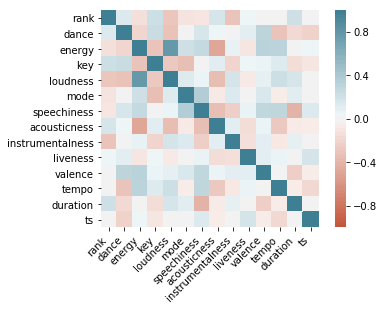

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [54]:
df.sort_values(['rank'])

,rank,artist,title,uris,artistID,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts
0,0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
1,1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.272,139.919,229573,4
2,2,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,4r63FhuTkUYltbVAg5TQnk,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.836,126.770,159715,4
3,3,Arizona Zervas,ROXANNE,spotify:track:696DnlkuDOXcMAnKlTgXXK,0vRvGUQVUjytro0xpb26bs,0.621,0.601,6,-5.616,0,0.1480,0.052200,0.000000,0.4600,0.457,116.735,163636,5
4,6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,5K4W6rqBFWDnAN6FQUkS6x,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.434,180.291,104591,4
5,7,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,6fOMl44jA4Sp5b9PpYCkzz,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.198,98.049,240429,4
6,8,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
7,10,Wale,On Chill (feat. Jeremih),spotify:track:5z51HY4ei5QhTjcvwq5Msw,67nwj3Y5sZQLl72VNUHEYE,0.597,0.733,1,-6.017,1,0.4100,0.134000,0.000000,0.1590,0.639,171.016,214035,4
8,11,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,5LHRHt1k9lMyONurDHEdrp,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.715,96.493,131607,4
9,14,Lil Baby,Woah,spotify:track:598yNsG1JFrGd4n2kMoz7F,5f7VJjfbwm532GiveGC0ZK,0.882,0.602,11,-5.554,1,0.2450,0.017700,0.000000,0.1780,0.430,142.959,183011,4


In [55]:
df.duration=df.duration/60000

In [56]:
cols=list(df.columns[4:])
cols.append('rank')

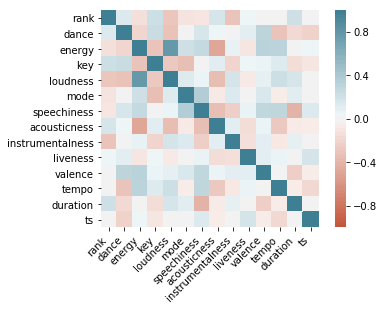

In [57]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

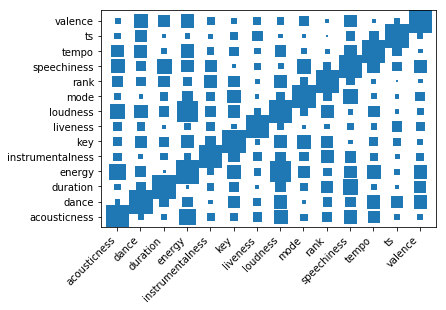

In [58]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = cols
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

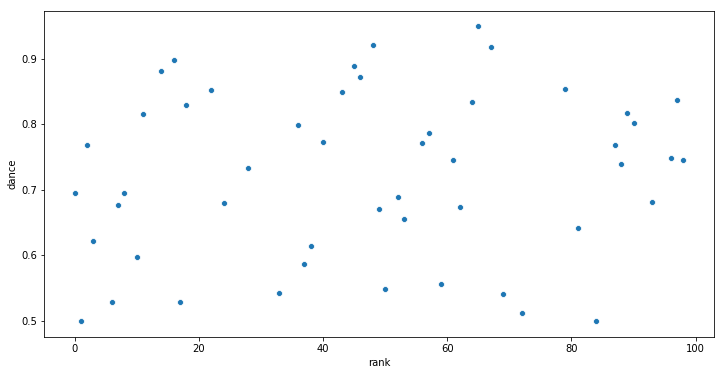

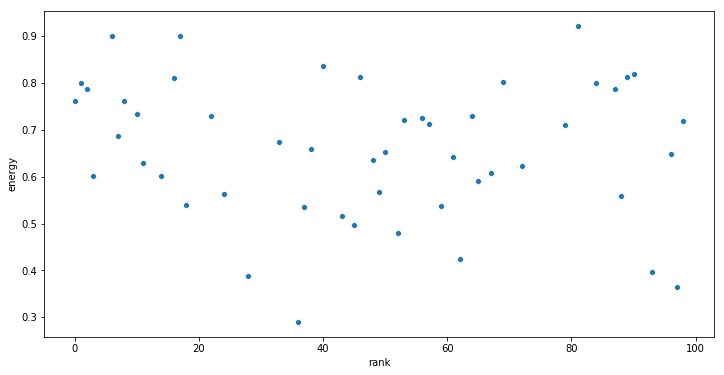

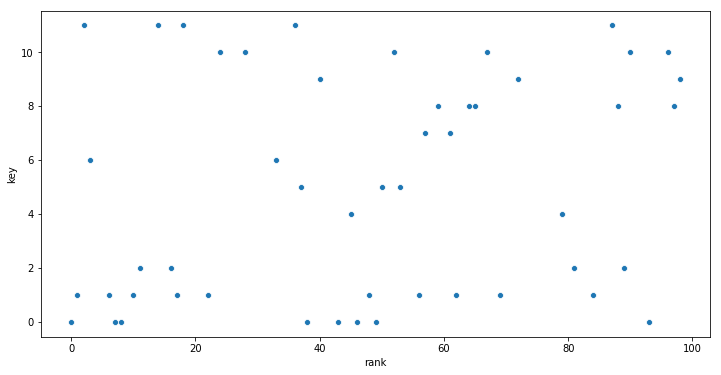

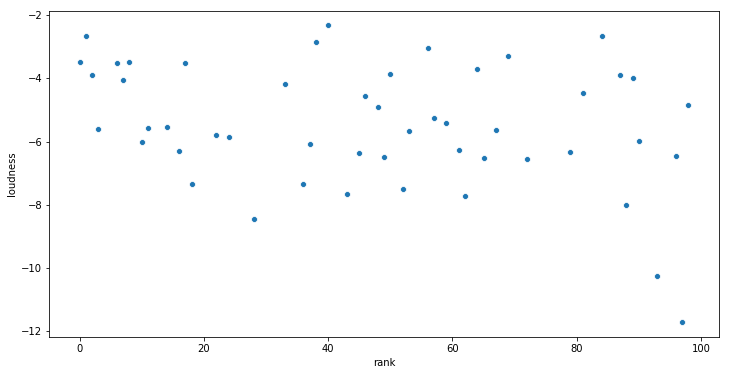

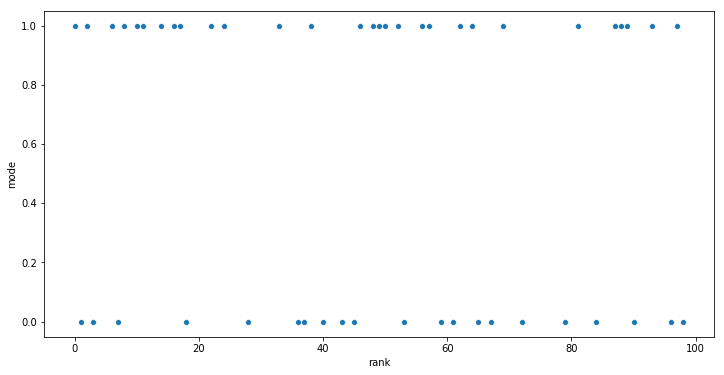

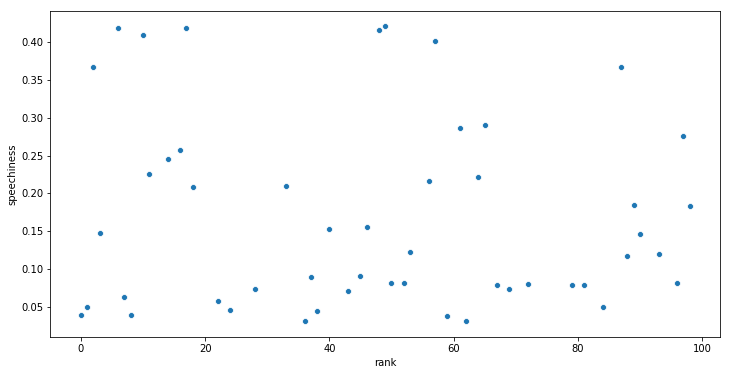

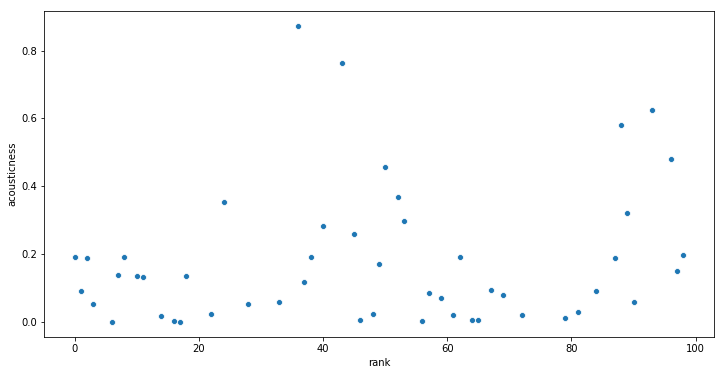

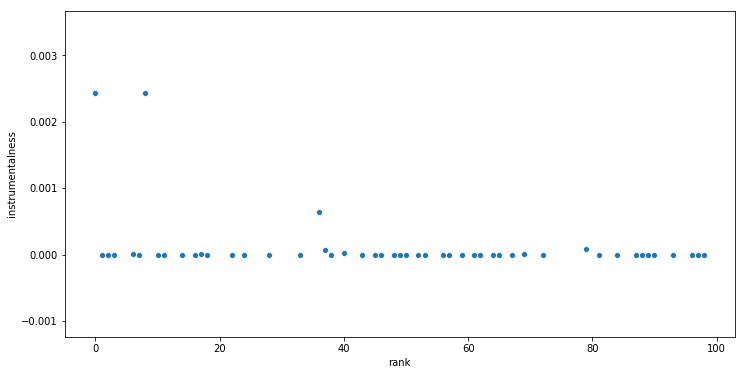

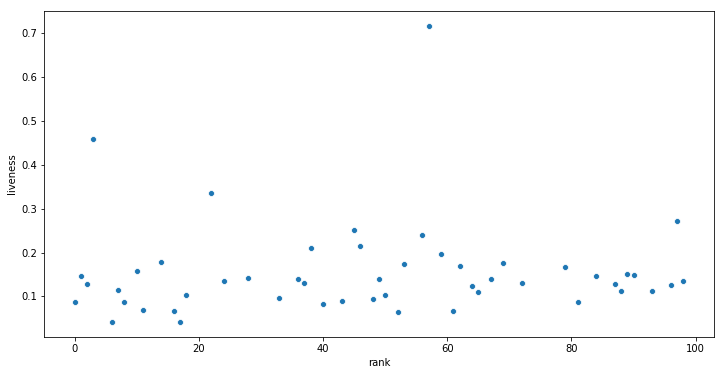

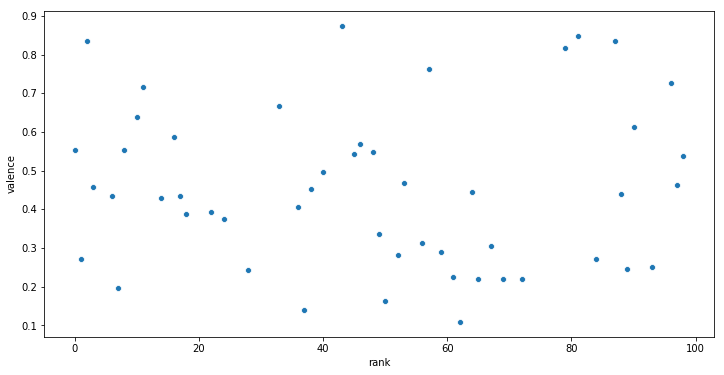

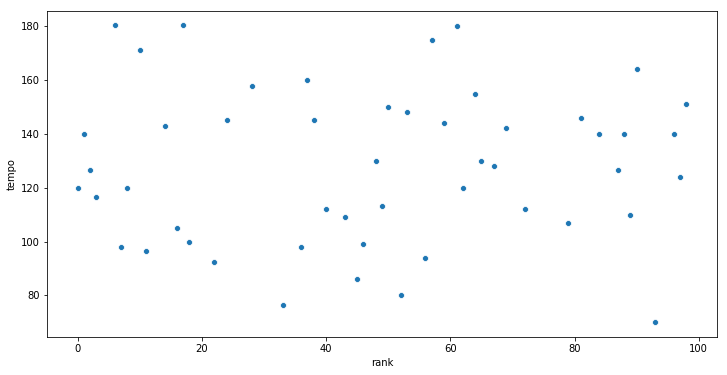

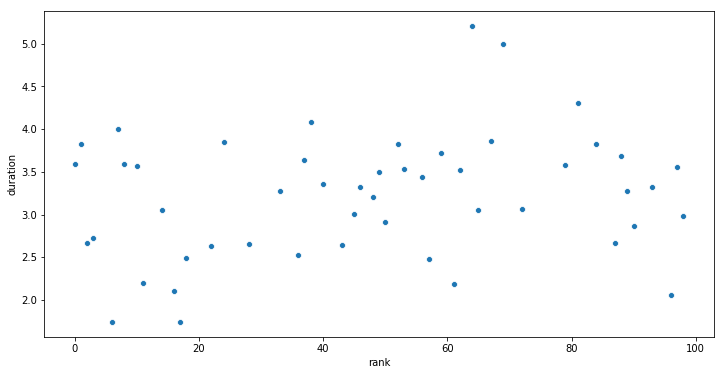

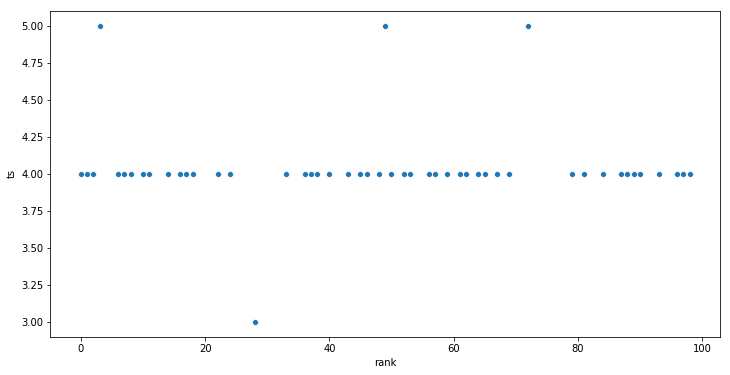

In [70]:
for c in df.columns[5:]:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='rank',y=c, data=df)